In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Original dataset

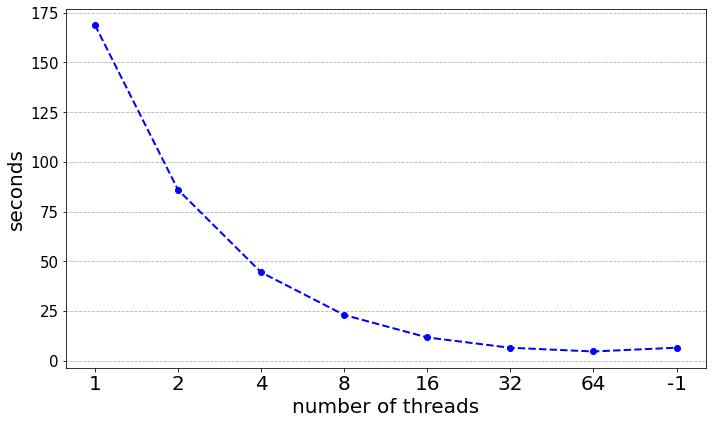

In [10]:
dicc = {}
number = 2**7
n_threads = [2**n for n in range(number) if 2**n < number]
n_threads.append(-1)
data = np.loadtxt('../results_E2_SyntheticData/dtwParallel_d_256.txt', dtype=str)
for index in range(len(n_threads)): 
    a = data[index*31+1:31*index+31]
    a = [word.rstrip(",[]") for word in a]
    a[0] = a[0][1:]
    if index == len(n_threads)-1:
        a=a[:-1]
    a = [float(i) for i in a]
    dicc[n_threads[index]] = a
    
values = []

ymin = []
ymax = []

keys = n_threads
for i in range(len(keys)):
    ymin.append(np.min(dicc[keys[i]]))
    ymax.append(np.max(dicc[keys[i]]))
    values.append(np.mean(dicc[keys[i]]))

fig, axis = plt.subplots(1,1,figsize=(10,6))

axis.plot(values,'bo--',linewidth=2,alpha=1)

keys_finales = list(map(str, n_threads)) 
plt.xticks(np.arange(len(n_threads)), keys_finales, fontsize=20)
keys_finales_2 = np.arange(0,200,25)
plt.yticks(keys_finales_2, fontsize=15)
axis.set_xlabel('number of threads',fontsize=20) 
axis.set_ylabel('seconds',fontsize=20) 
plt.tight_layout()
axis.yaxis.grid(linestyle = 'dashed')  # grid lines
axis.set_axisbelow(True)  # grid lines are behind the rest
# plt.savefig("../Figures/dtwParallel_dtw_D.png")

## Comparison of computational time between packages.

In [11]:
data = np.loadtxt('../results_E2_SyntheticData/dtw_256.txt', dtype=str)
a = [word.rstrip(",[]") for word in data]
a[0] = a[0][1:]
a = [float(i) for i in a]
dtw_value = np.mean(a)


In [12]:
data = np.loadtxt('../results_E2_SyntheticData/fastdtw_256.txt', dtype=str)
a = [word.rstrip(",[]") for word in data]
a[0] = a[0][1:]
a = [float(i) for i in a]
fastdtw_value = np.mean(a)


In [13]:
data = np.loadtxt('../results_E2_SyntheticData/dtaidistance_dep_256.txt', dtype=str)
a = [word.rstrip(",[]") for word in data]
a[0] = a[0][1:]
a = [float(i) for i in a]
dtaidistance_value = np.mean(a)


In [14]:
values = [dtw_value, fastdtw_value, dtaidistance_value, np.mean(dicc[32])]


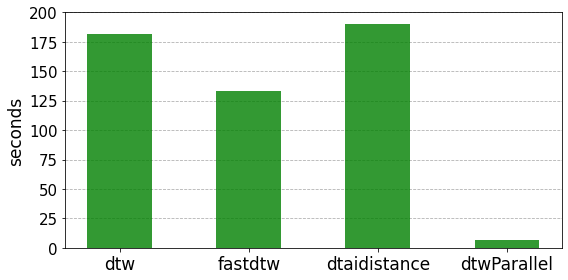

In [18]:
fig,axis = plt.subplots(1,1,figsize=(8,4))

plt.bar(np.arange(4), values, color='green', width=0.5, alpha=0.8)

keys_finales = ['dtw', 'fastdtw', 'dtaidistance', 'dtwParallel'] 
plt.xticks(np.arange(4), keys_finales, fontsize=17)
keys_finales_2 = np.arange(0,225,25)
plt.yticks(keys_finales_2, fontsize=15)
axis.set_ylabel('seconds',fontsize=17) 
plt.tight_layout()
axis.yaxis.grid(linestyle = 'dashed')  # grid lines
axis.set_axisbelow(True)  # grid lines are behind the rest

plt.savefig("../Figures/comparativeTime_256.png")